In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv('df_train_2.csv')
df_test = pd.read_csv('df_test_2.csv')

In [4]:
df = pd.concat([df_train,df_test])

In [5]:
df.shape

(5407, 29)

In [6]:
df[(df['MaritalStatus_Married'] == 1) & (df['Gender'] == 1) & (df['CityTier'] == 1)]

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Churn
10,0.327233,1.0,1.0,0.541002,1.0,0.515888,0.331418,1.000000,0.446283,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
12,0.627156,0.0,1.0,0.925589,1.0,0.263824,0.535825,0.000000,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
26,0.083451,0.0,1.0,0.346835,1.0,0.515888,0.331418,0.764137,0.279288,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
54,0.868862,0.0,1.0,0.112675,1.0,0.515888,0.331418,0.000000,0.566419,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
66,0.904099,0.0,1.0,0.770614,1.0,0.515888,0.535825,0.000000,0.738103,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,0.673332,0.0,1.0,0.676102,1.0,0.264825,0.529597,0.759734,0.892075,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1033,0.673332,0.0,1.0,0.785221,1.0,0.264825,0.328494,0.993147,0.282499,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1034,0.549836,0.0,1.0,0.608224,1.0,0.519160,0.529597,0.000000,0.454475,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1053,0.583476,0.0,1.0,0.676102,1.0,0.264825,0.529597,0.267850,0.454475,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [7]:
(334/5407) * 100

6.177177732568892

In [8]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')

# Total Pembelian

In [9]:
df['Total Pembelian'] = df['CashbackAmount'] * 50 * df['OrderCount']

In [10]:
df[['Total Pembelian', 'CashbackAmount']]

,Total Pembelian,CashbackAmount
0,7996.5,159.93
1,6045.0,120.90
2,6014.0,120.28
3,6703.5,134.07
4,6480.0,129.60
...,...,...
5625,15071.0,150.71
5626,22491.0,224.91
5627,18642.0,186.42
5628,17890.0,178.90


In [11]:
df['Total Pembelian'].sum()

154339328.5

# Potensi Kerugian

In [12]:
df[df['Churn'] == 1]['Total Pembelian'].sum()

23134478.0

In [13]:
(5/16.83 ) * 23134478

6872988.116458705

# Potensi Profit

In [14]:
23134478 - 6872988

16261490

# Insight

In [15]:
def cr(vc):
    return vc[1] / (vc[0] + vc[1]) * 100

## CashbackAmount

### Churn rate customer dengan cashback dibawah 240

In [16]:
cr(df[df['CashbackAmount'] < 240]['Churn'].value_counts())

18.431135309538213

### Churn rate customer dengan cashback minimal 240

In [17]:
cr(cvalue_counts())

5.067064083457526

### Churn rate customer dengan cashback minimal 270

In [18]:
cr(df[df['CashbackAmount'] >= 270]['Churn'].value_counts())

4.464285714285714

In [32]:
df['Churn'].value_counts()[1]

0    4682
1     948
Name: Churn, dtype: int64

In [33]:
(df[df['CashbackAmount'] < 240]['Churn'].value_counts()[1] / df['Churn'].value_counts()[1]) * 100

96.41350210970464

Karena menaikkan cashback ke 270 tidak menurunkan churn rate secara signifikan, maka cashback terbaik adalah 240

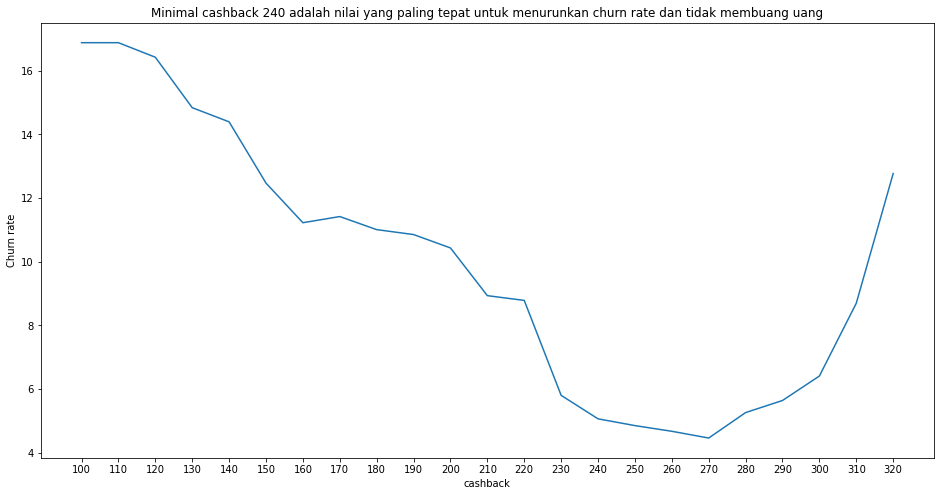

In [21]:
cashback = [i for i in range(100, 330, 10)]
churn_rate = []

for i in cashback:
    val_counts = df[df['CashbackAmount'] >= i]['Churn'].value_counts()
#     print(val_counts)
    churn_rate.append(val_counts[1] / (val_counts[1] + val_counts[0]) * 100)

plt.figure(figsize = (16,8))
ax = sns.lineplot(x = cashback, y = churn_rate)
ax.set_xticks(cashback);
ax.set_ylabel('Churn rate')
ax.set_xlabel('cashback');
ax.set_title('Minimal cashback 240 adalah nilai yang paling tepat untuk menurunkan churn rate dan tidak membuang uang');

### Persentase customer dengan cashback minimal 240

In [42]:
(df[df['CashbackAmount'] >= 240]['Churn'].shape[0] / df.shape[0]) * 100

11.918294849023091

## Tenure

### Churn rate customer dengan tenure 0 bulan

In [24]:
cr(df[df['Tenure'] == 0]['Churn'].value_counts())

53.54330708661418

### Churn rate customer dengan tenure lebih kecil dari 2 bulan

In [25]:
cr(df[df['Tenure'] < 2]['Churn'].value_counts())

51.83639398998331

### Churn rate customer dengan tenure minimal 2 bulan

In [23]:
cr(df[df['Tenure'] >= 2]['Churn'].value_counts())

5.902111324376199

### Total churn customer dengan tenure dibawah 2 bulan dibanding total churn customer

In [29]:
(df[df['Tenure'] < 2]['Churn'].value_counts()[1] / df['Churn'].value_counts()[1]) * 100

65.50632911392405

65.5% customer yang churn berasal dari customer yang memiliki tenure dibawah 2 bulan

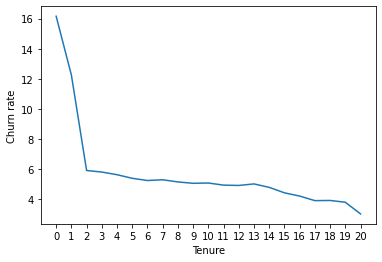

In [30]:
tenure = [i for i in range(21)]
churn_rate = []

for i in tenure:
    val_counts = df[df['Tenure'] >= i]['Churn'].value_counts()
#     print(val_counts)
    churn_rate.append(val_counts[1] / (val_counts[1] + val_counts[0]) * 100)

ax = sns.lineplot(x = tenure, y = churn_rate)
ax.set_xticks(tenure);
ax.set_ylabel('Churn rate')
ax.set_xlabel('Tenure');

Dapat terlihat bahwa setelah 2 bulan penurunan churn rate sudah tidak signifikan

### Persentase customer dengan tenure minimal 2 bulan

In [45]:
(df[df['Tenure'] >= 2]['Churn'].shape[0] / df.shape[0]) * 100

74.03197158081704

# Wanita yang sudah menikah dan berasal dari City tier 1

In [53]:
df_fmc = df[(df['Gender'] == 'Female') & (df['CityTier'] == 1) & (df['MaritalStatus'] == 'Married')]

In [54]:
(df_fmc.shape[0] / df.shape[0]) *100

13.108348134991118

In [55]:
cat = []
num = []

for col in df.columns:
    if df[col].dtype ==  'O':
        cat.append(col)
    else:
        num.append(col)

In [56]:
df_fmc[cat].describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,738,738,738,738,738
unique,3,6,1,6,1
top,Mobile Phone,Debit Card,Female,Laptop & Accessory,Married
freq,381,310,738,242,738


In [57]:
df_fmc.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Total Pembelian
count,738.000000,738.000000,707.000000,738.0,707.000000,705.000000,738.000000,738.000000,738.000000,738.000000,705.000000,694.000000,690.000000,694.000000,738.000000,690.000000
mean,53097.188347,0.078591,11.971711,1.0,15.717115,2.990071,3.716802,3.205962,4.388889,0.289973,15.756028,1.891931,3.256522,4.737752,179.759675,31249.442754
std,1572.744961,0.269282,8.614619,0.0,8.293434,0.727826,1.040439,1.402021,2.533196,0.454057,3.759087,2.026838,3.195515,3.916567,52.748229,37950.521310
min,50051.000000,0.000000,0.000000,1.0,6.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,51758.250000,0.000000,5.000000,1.0,9.000000,3.000000,3.000000,3.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.357500,8276.875000
50%,52835.000000,0.000000,11.000000,1.0,14.000000,3.000000,4.000000,3.000000,4.000000,0.000000,14.000000,1.000000,2.000000,3.000000,163.870000,16257.500000
75%,54572.750000,0.000000,18.000000,1.0,21.000000,3.000000,4.000000,4.000000,6.000000,1.000000,19.000000,2.000000,4.000000,8.000000,204.960000,36066.000000
max,55619.000000,1.000000,31.000000,1.0,36.000000,4.000000,6.000000,5.000000,11.000000,1.000000,26.000000,14.000000,16.000000,31.000000,324.730000,256360.000000


In [64]:
(df_fmc['Total Pembelian'].sum() / df['Total Pembelian'].sum()) * 100

13.970590457765276

In [63]:
df['Total Pembelian'].sum()

154339328.5

In [65]:
cat

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']